In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("../CWRU Dataset-1-train.csv")
Dtest = pd.read_csv("../CWRU Dataset-1-test.csv")

In [3]:
print(Dtrain.shape)
print(Dtest.shape)

(290688, 4)
(72672, 4)


In [4]:
Dtrain["Bearing"].value_counts()

Inner Race (0.007")    96896
Outer Race (0.007")    96896
Normal                 96896
Name: Bearing, dtype: int64

In [5]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Inner Race (0.007")    33.333333
Outer Race (0.007")    33.333333
Normal                 33.333333
Name: Bearing, dtype: float64

In [6]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))

In [10]:
X_train = X_train.values.reshape(-1, 1, X_train.shape[1])

X_test  = X_test.values.reshape(-1, 1, X_test.shape[1])

In [11]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [12]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])),
    Dropout(0.2),
    RepeatVector(X_train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(loss='mse',optimizer='adam' )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 6)              198       
Total params: 13,510
Trainable params: 13,510
Non-trainable params: 0
__________________________________________________

In [13]:
# Train model for 100 epochs, batch size of 100: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(X_train,X_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_data=(X_test, X_test),
                  shuffle=False)

Train on 290688 samples, validate on 72672 samples
Epoch 1/100
290688/290688 [==============================] - 4s 13us/step - loss: 0.1344 - val_loss: 0.2390
Epoch 2/100
290688/290688 [==============================] - 3s 11us/step - loss: 0.0902 - val_loss: 0.0898
Epoch 3/100
290688/290688 [==============================] - 3s 10us/step - loss: 0.0398 - val_loss: 0.0366
Epoch 4/100
290688/290688 [==============================] - 3s 11us/step - loss: 0.0258 - val_loss: 0.0128
Epoch 5/100
290688/290688 [==============================] - 3s 10us/step - loss: 0.0190 - val_loss: 0.0088
Epoch 6/100
290688/290688 [==============================] - 3s 11us/step - loss: 0.0161 - val_loss: 0.0080
Epoch 7/100
290688/290688 [==============================] - 3s 12us/step - loss: 0.0142 - val_loss: 0.0063
Epoch 8/100
290688/290688 [==============================] - 4s 15us/step - loss: 0.0127 - val_loss: 0.0056
Epoch 9/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0

290688/290688 [==============================] - 5s 16us/step - loss: 0.0049 - val_loss: 0.0027
Epoch 76/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0049 - val_loss: 0.0025
Epoch 77/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0049 - val_loss: 0.0025
Epoch 78/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0049 - val_loss: 0.0026
Epoch 79/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0049 - val_loss: 0.0027
Epoch 80/100
290688/290688 [==============================] - 4s 15us/step - loss: 0.0049 - val_loss: 0.0027
Epoch 81/100
290688/290688 [==============================] - 4s 15us/step - loss: 0.0049 - val_loss: 0.0026
Epoch 82/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0049 - val_loss: 0.0025
Epoch 83/100
290688/290688 [==============================] - 5s 16us/step - loss: 0.0049 - val_loss: 0.0025
Epoch 84/100
290688/290688 [====

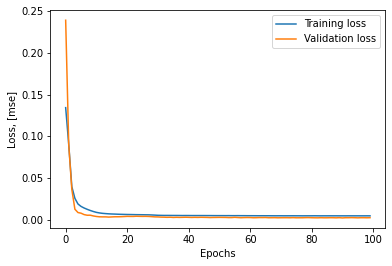

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [15]:
X_pred = model.predict(X_train)

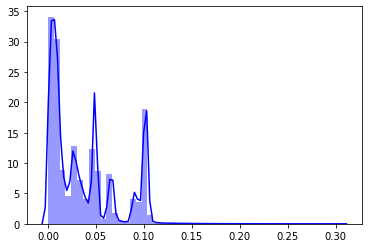

In [16]:
import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
#g.set(xlim=(0.10,0.1), ylim=(0, 1))
plt.show()

In [17]:
model.evaluate(X_test,X_test)

72672/72672 [==============================] - 2s 23us/step


0.0026295238781417394

In [18]:
X_test_pred = model.predict(X_test)

In [19]:
X_test_pred = X_test_pred.reshape(X_test_pred.shape[0],X_test_pred.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2])

In [20]:
TH = 0.1
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_test_pred-X_test), axis = 1)
scored['Threshold'] = TH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
13759,0.055861,0.1,False
58058,0.007843,0.1,False
62691,0.018189,0.1,False
8744,0.056459,0.1,False
32829,0.037868,0.1,False
...,...,...,...
49347,0.006133,0.1,False
50867,0.006689,0.1,False
37526,0.036414,0.1,False
57131,0.005392,0.1,False


In [21]:
X_pred_train = model.predict(np.array(X_train))

In [22]:
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0],X_pred_train.shape[2])
X_train = X_train.reshape(X_train.shape[0],X_train.shape[2])

In [23]:
X_pred_train = pd.DataFrame(X_pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [24]:
scored_train['Loss_mae'].mean()

0.03700937661300958

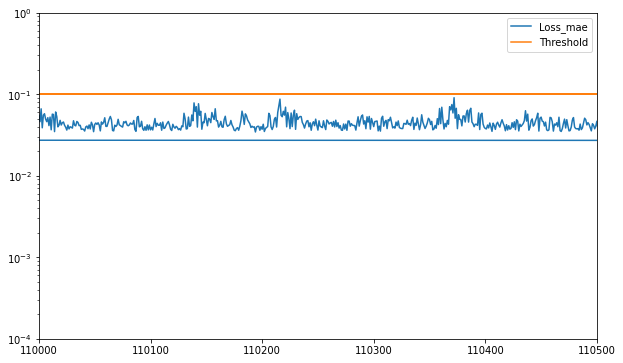

In [25]:
scored.plot(logy=True,  figsize = (10,6), xlim = [110000,110500], ylim = [1e-4,1e-0])

In [26]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.052704,0.1,False
1,0.053289,0.1,False
2,0.053227,0.1,False
3,0.054782,0.1,False
4,0.052109,0.1,False
...,...,...,...
290683,0.006582,0.1,False
290684,0.005665,0.1,False
290685,0.007447,0.1,False
290686,0.006811,0.1,False


In [27]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
97406   0.101364        0.1     True
98245   0.108451        0.1     True
102362  0.100236        0.1     True
104039  0.101480        0.1     True
104802  0.100208        0.1     True
107318  0.103605        0.1     True
110597  0.104105        0.1     True
111817  0.100870        0.1     True
112656  0.100067        0.1     True
117993  0.103974        0.1     True
120509  0.100812        0.1     True
122949  0.102304        0.1     True
122954  0.100111        0.1     True
123787  0.103869        0.1     True
124626  0.102117        0.1     True
125846  0.107074        0.1     True
127066  0.106544        0.1     True
130345  0.100469        0.1     True
133853  0.101558        0.1     True
134081  0.111602        0.1     True
138199  0.101870        0.1     True
139419  0.102756        0.1     True
139877  0.107438        0.1     True
141478  0.107513        0.1     True
147658  0.100505        0.1     True
151772  0.104336        0.1     True
1

In [28]:
NB_anomalies = anomalies[anomalies.index <= 96896]
print(NB_anomalies)
print(NB_anomalies.shape)

Empty DataFrame
Columns: [Loss_mae, Threshold, Anomaly]
Index: []
(0, 3)


In [29]:
IROR7_anomalies = anomalies[anomalies.index > 96896]
print(IROR7_anomalies)
print(IROR7_anomalies.shape)

        Loss_mae  Threshold  Anomaly
97406   0.101364        0.1     True
98245   0.108451        0.1     True
102362  0.100236        0.1     True
104039  0.101480        0.1     True
104802  0.100208        0.1     True
107318  0.103605        0.1     True
110597  0.104105        0.1     True
111817  0.100870        0.1     True
112656  0.100067        0.1     True
117993  0.103974        0.1     True
120509  0.100812        0.1     True
122949  0.102304        0.1     True
122954  0.100111        0.1     True
123787  0.103869        0.1     True
124626  0.102117        0.1     True
125846  0.107074        0.1     True
127066  0.106544        0.1     True
130345  0.100469        0.1     True
133853  0.101558        0.1     True
134081  0.111602        0.1     True
138199  0.101870        0.1     True
139419  0.102756        0.1     True
139877  0.107438        0.1     True
141478  0.107513        0.1     True
147658  0.100505        0.1     True
151772  0.104336        0.1     True
1

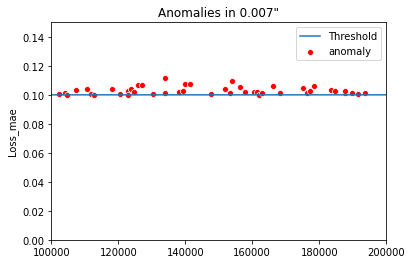

In [38]:
#plt.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
plt.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (100000, 200000), ylim = (0, 0.15))
plt.title('Anomalies in 0.007"')
plt.legend();